Accuracy: 0.9772727272727273


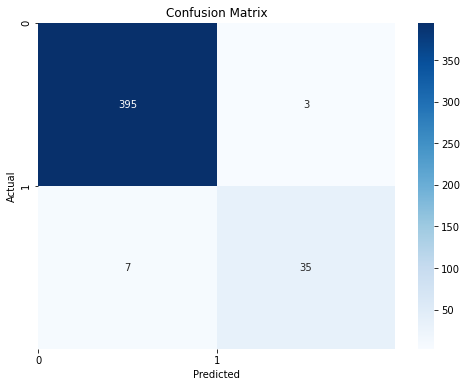

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv('new_data.csv')

# Assuming your target variable is in the 'label' column and the features are in other columns
X = data.drop('cluster_label', axis=1)  # Features
y = data['cluster_label']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier()

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = rf_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
      
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Define class labels (replace with your own class labels)
classes = np.unique(y)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)
plt.show()

In [8]:
import joblib

joblib.dump(rf_classifier, 'RandomForests.pkl')

['RandomForests.pkl']

In [11]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# Calculate F1-score
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

# Calculate confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)


Accuracy: 0.9803030303030303
Precision: 0.9649122807017544
Recall: 0.8333333333333334
F1-score: 0.8943089430894309
Confusion Matrix:
[[592   2]
 [ 11  55]]


In [1]:
from imblearn.over_sampling import SMOTE, ADASYN


In [3]:
from sklearn.model_selection import train_test_split
import pandas as pd
data = pd.read_csv('new_data.csv')

# Assuming your target variable is in the 'label' column and the features are in other columns
X = data.drop('cluster_label', axis=1)  # Features
y = data['cluster_label']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [5]:
from sklearn.linear_model import LogisticRegression
# Create your model (e.g., Logistic Regression)
model = LogisticRegression()

# Train the model on the resampled training data
model.fit(X_train, y_train)


/opt/conda/envs/anaconda-2022.05-py39/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [7]:
from sklearn.metrics import accuracy_score
# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.975


In [7]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rf_classifier, X, y, cv=5)

# Print the cross-validation scores
print("Cross-Validation Scores:", scores)
print("Mean Accuracy:", scores.mean())

Cross-Validation Scores: [0.93636364 1.         1.         0.98636364 0.97727273]
Mean Accuracy: 0.9800000000000001


In [12]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler


In [14]:
from sklearn.model_selection import train_test_split
import pandas as pd
data = pd.read_csv('my_data_with_clusters_kmeans.csv')

# Assuming your target variable is in the 'label' column and the features are in other columns
X = data.drop('cluster_label', axis=1)  # Features
y = data['cluster_label']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
undersampler = RandomUnderSampler(random_state=42)
X_train_undersampled, y_train_undersampled = undersampler.fit_resample(X_train, y_train)


In [16]:
oversampler = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train_undersampled, y_train_undersampled)


In [17]:
# Create your model (e.g., Logistic Regression)
model = LogisticRegression()

# Train the model on the resampled training data
model.fit(X_train_resampled, y_train_resampled)


LogisticRegression()

In [18]:
# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [ ]:
from sklearn_porter import Porter

# Assuming you have trained and named your scikit-learn model 'model'
model = ...

# Initialize the Porter converter with your scikit-learn model
porter = Porter(model, language='java')

# Convert the scikit-learn model to TensorFlow code
tensorflow_code = porter.export(embed_data=True)

# Save the TensorFlow code to a file
with open('path/to/converted_model.py', 'w') as f:
    f.write(tensorflow_code)
